In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from pandas import to_datetime
from fbprophet import Prophet
%matplotlib inline

import numpy as np
import seaborn as sb

import warnings;
warnings.simplefilter('ignore')
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Electric_Consumption_And_Cost__2010_-_April_2020_.csv to Electric_Consumption_And_Cost__2010_-_April_2020_.csv


Daily 

In [ ]:
import io
  
data_1 = pd.read_csv(io.BytesIO(uploaded['Electric_Consumption_And_Cost__2010_-_April_2020_.csv']))
data_1 = data_1[['Service End Date', 'Consumption (KW)']].copy().dropna()
print(data_1)

       Service End Date  Consumption (KW)
0            01/26/2010            216.00
1            02/25/2010            224.00
2            03/26/2010            216.00
3            04/26/2010            208.00
4            05/24/2010            216.00
...                 ...               ...
362625       02/25/2021            109.44
362626       02/25/2021            141.24
362627       02/25/2021              0.00
362628       02/25/2021              0.00
362629       02/25/2021              0.00

[362622 rows x 2 columns]


In [ ]:
data_1 = data_1[['Service End Date', 'Consumption (KW)']]
data_1.head()

,Service End Date,Consumption (KW)
0,01/26/2010,216.0
1,02/25/2010,224.0
2,03/26/2010,216.0
3,04/26/2010,208.0
4,05/24/2010,216.0


In [ ]:
data_1.columns=["ds","y"]

In [ ]:
data_1=data_1.replace(',','', regex=True)

In [ ]:
data_1['ds']=to_datetime(data_1['ds'])

In [ ]:
data_1['ds'].isnull().sum()

0

In [ ]:
m = Prophet(interval_width = 0.95,
            n_changepoints=250,
            changepoint_range=1.0,
            changepoint_prior_scale=10,
            daily_seasonality=False)
mdl = m.fit(data_1)

In [ ]:
future = m.make_future_dataframe(periods = 365, freq = 'D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
957,2022-02-21,-14.883067,-1222.837213,1205.509949,-18.251979,-11.571018,56.808402,56.808402,56.808402,118.670058,118.670058,118.670058,-60.203509,-60.203509,-60.203509,-1.658147,-1.658147,-1.658147,0.0,0.0,0.0,41.925335
958,2022-02-22,-14.916474,-1217.452434,1253.437463,-18.307550,-11.594027,55.594295,55.594295,55.594295,118.670058,118.670058,118.670058,-63.001571,-63.001571,-63.001571,-0.074192,-0.074192,-0.074192,0.0,0.0,0.0,40.677821
959,2022-02-23,-14.949882,-1219.072023,1189.985852,-18.351564,-11.617037,56.232497,56.232497,56.232497,118.670058,118.670058,118.670058,-63.967286,-63.967286,-63.967286,1.529725,1.529725,1.529725,0.0,0.0,0.0,41.282616
960,2022-02-24,-14.983289,-1141.635254,1247.103867,-18.395579,-11.640046,54.571855,54.571855,54.571855,118.670058,118.670058,118.670058,-67.212362,-67.212362,-67.212362,3.114159,3.114159,3.114159,0.0,0.0,0.0,39.588567
961,2022-02-25,-15.016696,-1129.071839,1149.706930,-18.439593,-11.663417,58.591875,58.591875,58.591875,118.670058,118.670058,118.670058,-64.717999,-64.717999,-64.717999,4.639816,4.639816,4.639816,0.0,0.0,0.0,43.575179


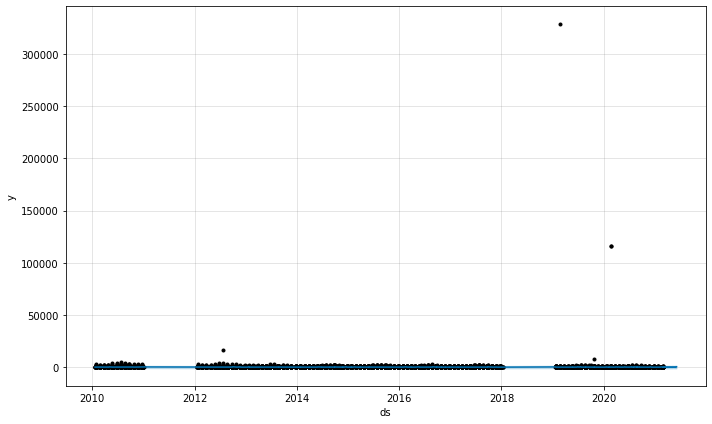

In [ ]:
plot_1 = mdl.plot(forecast)

In [ ]:
future = m.make_future_dataframe(periods = 200, freq = 'D')
forecast_1 = m.predict(future)
forecast_1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
792,2021-09-09,107.534933,-1165.412192,1266.879861,106.772314,108.227979,-58.457327,-58.457327,-58.457327,-64.778266,-64.778266,-64.778266,6.320938,6.320938,6.320938,0.0,0.0,0.0,49.077605
793,2021-09-10,107.502752,-1163.247610,1225.191933,106.734207,108.200999,-58.483112,-58.483112,-58.483112,-61.906331,-61.906331,-61.906331,3.423219,3.423219,3.423219,0.0,0.0,0.0,49.019639
794,2021-09-11,107.470571,-931.083995,1446.476490,106.696594,108.174018,113.695511,113.695511,113.695511,112.790183,112.790183,112.790183,0.905328,0.905328,0.905328,0.0,0.0,0.0,221.166082
795,2021-09-12,107.438390,-930.349202,1443.953307,106.662036,108.147038,192.072023,192.072023,192.072023,193.204392,193.204392,193.204392,-1.132369,-1.132369,-1.132369,0.0,0.0,0.0,299.510413
796,2021-09-13,107.406209,-1286.197640,1193.667831,106.625890,108.120058,-60.257911,-60.257911,-60.257911,-57.656920,-57.656920,-57.656920,-2.600991,-2.600991,-2.600991,0.0,0.0,0.0,47.148299


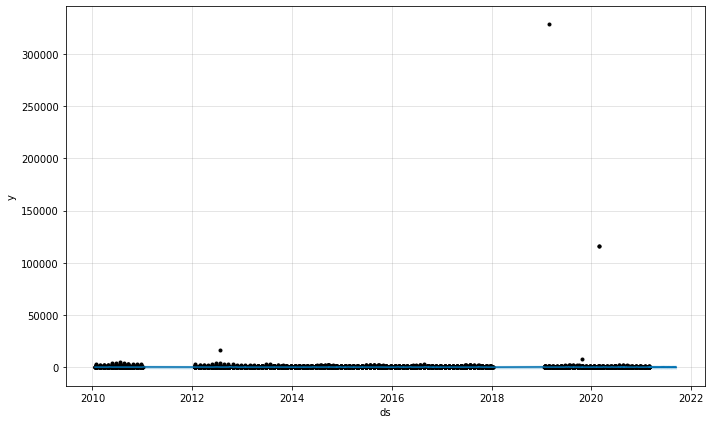

In [ ]:
plot_2 = mdl.plot(forecast_1)

In [ ]:
future = m.make_future_dataframe(periods = 100, freq = 'D')
forecast_2 = m.predict(future)
forecast_2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
692,2021-06-01,109.456125,-1146.165503,1293.518391,109.035856,109.933327,-41.868869,-41.868869,-41.868869,-60.938486,-60.938486,-60.938486,19.069616,19.069616,19.069616,0.0,0.0,0.0,67.587256
693,2021-06-02,109.421027,-1139.907253,1234.777945,108.994446,109.905934,-39.376849,-39.376849,-39.376849,-61.830194,-61.830194,-61.830194,22.453345,22.453345,22.453345,0.0,0.0,0.0,70.044179
694,2021-06-03,109.385929,-1098.292870,1305.517033,108.953079,109.881823,-39.345098,-39.345098,-39.345098,-65.039169,-65.039169,-65.039169,25.694072,25.694072,25.694072,0.0,0.0,0.0,70.040832
695,2021-06-04,109.350832,-1241.383014,1293.660784,108.911769,109.857780,-33.789867,-33.789867,-33.789867,-62.520378,-62.520378,-62.520378,28.730511,28.730511,28.730511,0.0,0.0,0.0,75.560965
696,2021-06-05,109.315734,-913.413521,1488.814997,108.870459,109.832175,148.701011,148.701011,148.701011,117.197899,117.197899,117.197899,31.503112,31.503112,31.503112,0.0,0.0,0.0,258.016745


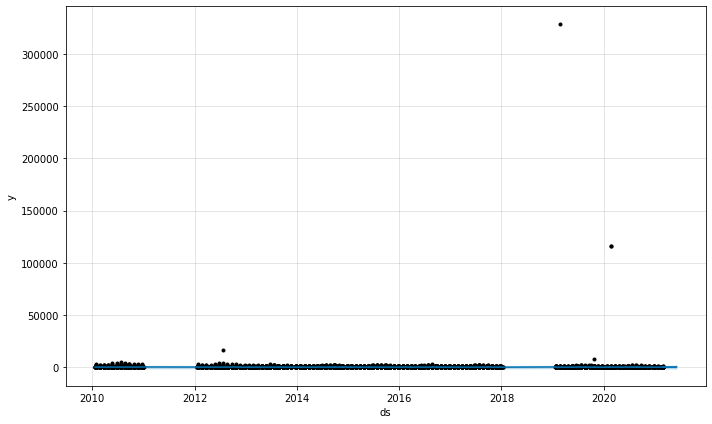

In [ ]:
plot_3 = mdl.plot(forecast_2)

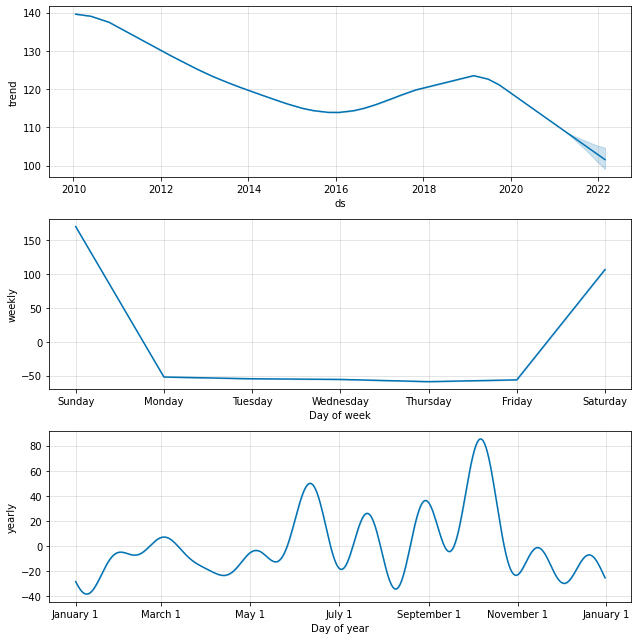

In [ ]:
plot_2 = mdl.plot_components(forecast)

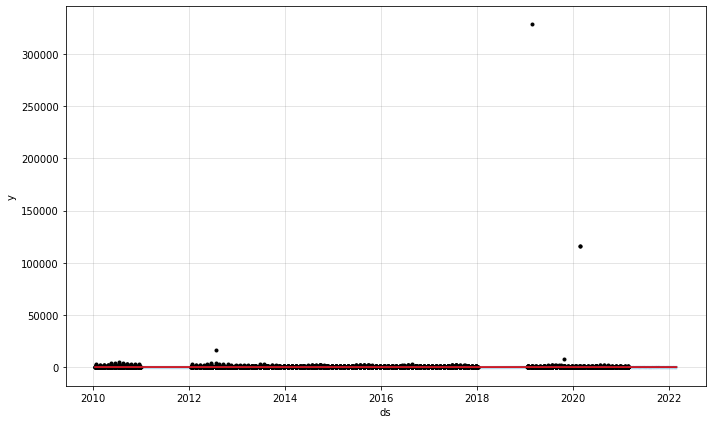

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig_1 = m.plot(forecast,plot_cap=True, uncertainty=True)
a_2 = add_changepoints_to_plot(fig_1.gca(), m, forecast)

In [ ]:
future = m.make_future_dataframe( 6, freq = 'M')
Forcast = m.predict(future)
Forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-20,139.609538,-1127.221167,1354.869524,139.609538,139.609538,-75.805058,-75.805058,-75.805058,-55.504988,-55.504988,-55.504988,-20.300069,-20.300069,-20.300069,0.0,0.0,0.0,63.804481
1,2010-01-26,139.584592,-1050.663598,1264.566484,139.584592,139.584592,-63.251482,-63.251482,-63.251482,-54.557722,-54.557722,-54.557722,-8.693760,-8.693760,-8.693760,0.0,0.0,0.0,76.333110
2,2010-01-28,139.576277,-1110.662582,1340.583703,139.576277,139.576277,-65.269191,-65.269191,-65.269191,-58.803310,-58.803310,-58.803310,-6.465881,-6.465881,-6.465881,0.0,0.0,0.0,74.307086
3,2010-01-29,139.572119,-1159.674321,1245.918016,139.572119,139.572119,-61.881714,-61.881714,-61.881714,-56.171299,-56.171299,-56.171299,-5.710414,-5.710414,-5.710414,0.0,0.0,0.0,77.690405
4,2010-02-19,139.484807,-1215.851875,1221.163655,139.484807,139.484807,-58.612209,-58.612209,-58.612209,-56.171299,-56.171299,-56.171299,-2.440910,-2.440910,-2.440910,0.0,0.0,0.0,80.872597


In [ ]:
future = m.make_future_dataframe(periods = 9, freq = 'M')
forecast = m.predict(future)
forecast.head().T

,0,1,2,3,4
ds,2010-01-20 00:00:00,2010-01-26 00:00:00,2010-01-28 00:00:00,2010-01-29 00:00:00,2010-02-19 00:00:00
trend,139.61,139.585,139.576,139.572,139.485
yhat_lower,-1129.23,-1188.2,-1094.79,-1163.74,-1166
yhat_upper,1272.46,1338.53,1284,1263.68,1259.93
trend_lower,139.61,139.585,139.576,139.572,139.485
trend_upper,139.61,139.585,139.576,139.572,139.485
additive_terms,-75.8051,-63.2515,-65.2692,-61.8817,-58.6122
additive_terms_lower,-75.8051,-63.2515,-65.2692,-61.8817,-58.6122
additive_terms_upper,-75.8051,-63.2515,-65.2692,-61.8817,-58.6122
weekly,-55.505,-54.5577,-58.8033,-56.1713,-56.1713


In [ ]:
df['Service End Date'] = pd.to_datetime(df['Service End Date'], dayfirst=True)
# df.columns = ['y', 'ds']

df['month'], df['year'] = df['Service End Date'].dt.month, df['Service End Date'].dt.year
df.head()

daily_df = df[['Service End Date', 'Consumption (KW)']].copy().dropna()
daily_df.columns = ['ds', 'y']
daily_df.head()

daily_df.dtypes

monthly_df = daily_df.groupby(pd.PeriodIndex(daily_df['ds'], freq='M'))['y'].mean().to_timestamp().reset_index()
monthly_df.head()
monthly_df.dtypes

annual_df = daily_df.groupby(pd.PeriodIndex(daily_df['ds'], freq='Y'))['y'].mean().to_timestamp().reset_index()
annual_df.head()

,ds,y
0,2010-01-01,86.332974
1,2011-01-01,0.000000
2,2012-01-01,71.050691
3,2013-01-01,66.071398
4,2014-01-01,62.291844


In [ ]:
def train_model(growth, seasonality, df):
    model = None

    if seasonality == 'daily':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=30, n_changepoints=3,
        daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality('daily', period=1, fourier_order=15)
        model.fit(df)

    elif seasonality == 'monthly':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=30, n_changepoints=3,
        daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality(name='monthly', period=30.5, fourier_order=12)
        model.fit(df)

    elif seasonality == 'annual':
        model = Prophet(interval_width=0.95, growth=growth, changepoint_prior_scale=30, n_changepoints=2,
         daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
        model.add_seasonality(name='annual', period=365.25, fourier_order=20)
        model.fit(df)      

    return model

In [ ]:
def get_forecast(model, time_period, freq):
    future_df = model.make_future_dataframe(periods=time_period, freq=freq)
    forecast = model.predict(future_df)
    return future_df, forecast

def evaluate_forecast(forecast, actual, time_period):
    # y_true = cv_results.y
    # y_pred = cv_results.yhat
    # print(len(forecast))
    y_true = actual
    y_pred = forecast[:(len(forecast)-time_period)]

    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print("Mean Absolute Error :", mae)
    print("Mean Absolute Percentage Error :", mape)
    plt.plot(forecast, c='orange', label='Predicted')
    plt.plot(y_true, c='blue', label='Actual')
    plt.legend(loc='lower right')
    plt.show()

def evaluate_forecast_daily(forecast, actual):
    # y_true = cv_results.y
    # y_pred = cv_results.yhat
    print(len(forecast))
    y_true = actual[-len(forecast):]
    y_pred = forecast

    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print("Mean Absolute Error :", mae)
    print("Mean Absolute Percentage Error :", mape)
    plt.plot(y_pred, c='orange', label='Predicted')
    plt.plot(y_true, c='blue', label='Actual')
    plt.legend(loc='lower right')
    plt.axis([0, 400, 0, 500])
    plt.show()


In [ ]:
df_daily = pd.DataFrame(daily_df[-6000:])
df_daily.dtypes
model_daily = train_model(growth='linear', seasonality='daily', df=df_daily)
future_daily, forecast_daily = get_forecast(model=model_daily, time_period=365, freq='D')

forecast_daily.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-24,179.517738,-109.592560,185.732996,179.517738,179.517738,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,0.0,0.0,0.0,39.745509
1,2020-02-25,178.849494,-94.960032,180.537008,178.849494,178.849494,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,0.0,0.0,0.0,39.077266
2,2020-03-25,178.243899,-105.461789,177.386354,178.243899,178.243899,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,0.0,0.0,0.0,38.471670
3,2020-04-08,177.951542,-102.413017,185.635881,177.951542,177.951542,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,0.0,0.0,0.0,38.179314
4,2020-04-23,177.638303,-94.245243,175.225276,177.638303,177.638303,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,-139.772229,0.0,0.0,0.0,37.866074


384
Mean Absolute Error : 51.716294115337156
Mean Absolute Percentage Error : 1.0249792948145954e+17


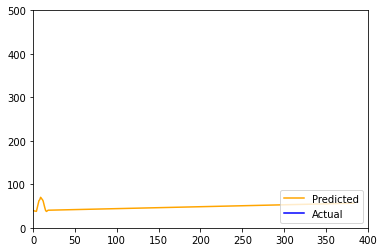

In [ ]:
evaluate_forecast_daily(forecast_daily['yhat'], df_daily['y'])

In [ ]:
model_monthly = train_model(growth='linear', seasonality='monthly', df=monthly_df)
future_monthly, forecast_monthly = get_forecast(model=model_monthly, time_period=1, freq='M')

forecast_monthly.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,12.697937,39.943530,117.063281,12.697937,12.697937,63.748197,63.748197,63.748197,63.748197,63.748197,63.748197,0.0,0.0,0.0,76.446134
1,2010-02-01,12.202759,32.573242,109.174829,12.202759,12.202759,57.739637,57.739637,57.739637,57.739637,57.739637,57.739637,0.0,0.0,0.0,69.942396
2,2010-03-01,11.755502,43.924437,119.343686,11.755502,11.755502,69.293395,69.293395,69.293395,69.293395,69.293395,69.293395,0.0,0.0,0.0,81.048897
3,2010-04-01,11.260324,49.609713,126.085883,11.260324,11.260324,75.731727,75.731727,75.731727,75.731727,75.731727,75.731727,0.0,0.0,0.0,86.992051
4,2010-05-01,10.781120,40.005697,119.178104,10.781120,10.781120,69.293395,69.293395,69.293395,69.293395,69.293395,69.293395,0.0,0.0,0.0,80.074515


Mean Absolute Error : 14.5970226562751
Mean Absolute Percentage Error : 2723232582833292.0


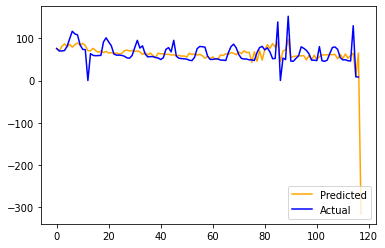

In [ ]:
evaluate_forecast(forecast_monthly['yhat'], monthly_df['y'], 1)

In [ ]:
model_annual= train_model(growth='linear', seasonality='annual', df=annual_df)
future_annual, forecast_annual = get_forecast(model=model_annual, time_period=1, freq='Y')

forecast_annual.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,annual,annual_lower,annual_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,7.955614,19.154725,93.204968,7.955614,7.955614,48.313398,48.313398,48.313398,48.313398,48.313398,48.313398,0.0,0.0,0.0,56.269012
1,2011-01-01,8.210742,15.034480,93.223949,8.210742,8.210742,45.575222,45.575222,45.575222,45.575222,45.575222,45.575222,0.0,0.0,0.0,53.785964
2,2012-01-01,8.465870,12.104387,91.120272,8.465870,8.465870,43.902086,43.902086,43.902086,43.902086,43.902086,43.902086,0.0,0.0,0.0,52.367956
3,2013-01-01,8.721697,22.127083,100.853852,8.721697,8.721697,52.095222,52.095222,52.095222,52.095222,52.095222,52.095222,0.0,0.0,0.0,60.816919
4,2014-01-01,8.976824,21.905242,94.886886,8.976824,8.976824,48.313398,48.313398,48.313398,48.313398,48.313398,48.313398,0.0,0.0,0.0,57.290222


Mean Absolute Error : 13.098777319279227
Mean Absolute Percentage Error : 2.01858707462664e+16


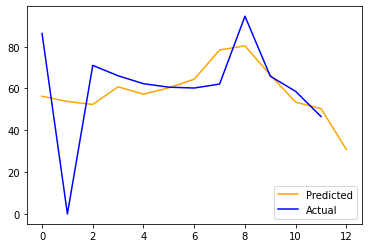

In [ ]:
evaluate_forecast(forecast_annual['yhat'], annual_df['y'], 1)

CROSS VALIDATION

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
data_1_CV = cross_validation(mdl, initial='3000 days',period='100 days', horizon='365 days')
data_1_CV.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2018-07-06 00:00:00 and 2020-02-26 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-19,237.209809,15.899032,473.913491,172.5,2018-07-06
1,2019-01-24,52.747405,-166.913435,277.775038,62.4,2018-07-06
2,2019-01-24,52.747405,-174.984687,273.671860,55.2,2018-07-06
3,2019-01-24,52.747405,-174.885858,270.474858,60.8,2018-07-06
4,2019-01-24,52.747405,-174.329038,284.517016,196.0,2018-07-06


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
data_1_PM = performance_metrics(data_1_CV)
data_1_PM.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,10 days,32520.209473,180.333606,86.209162,2.967458,0.935653
1,11 days,34304.266610,185.214110,86.291308,2.923859,0.936005
2,12 days,19596.871189,139.988825,63.918453,1.480910,0.986686
3,13 days,18960.733396,137.697979,63.513677,1.333105,0.985863
4,14 days,16680.449415,129.152814,62.042872,1.382825,0.985887


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

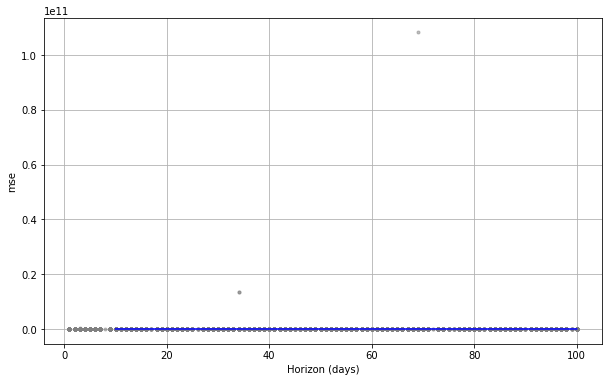

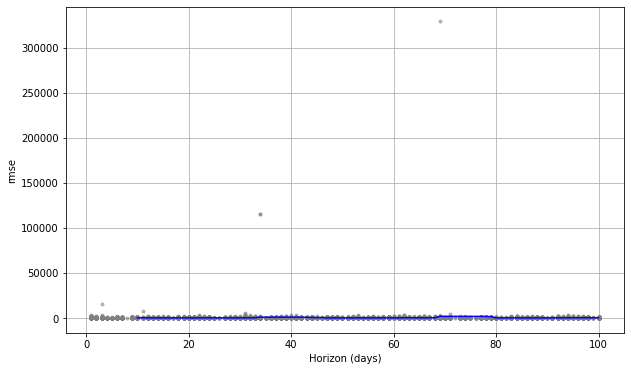

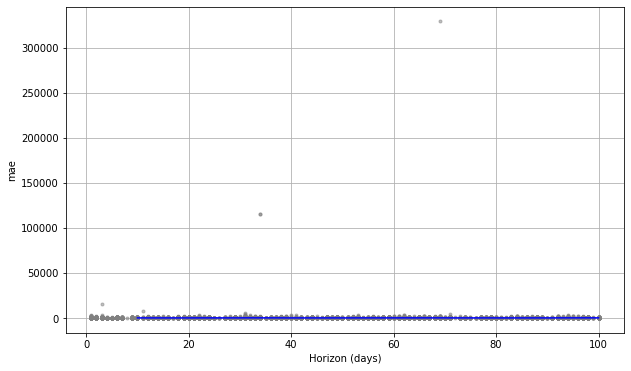

In [ ]:
plt_mse = plot_cross_validation_metric(data_1_CV ,metric='mse')
plt_rmse = plot_cross_validation_metric(data_1_CV ,metric='rmse')
plt_mae = plot_cross_validation_metric(data_1_CV ,metric='mae')

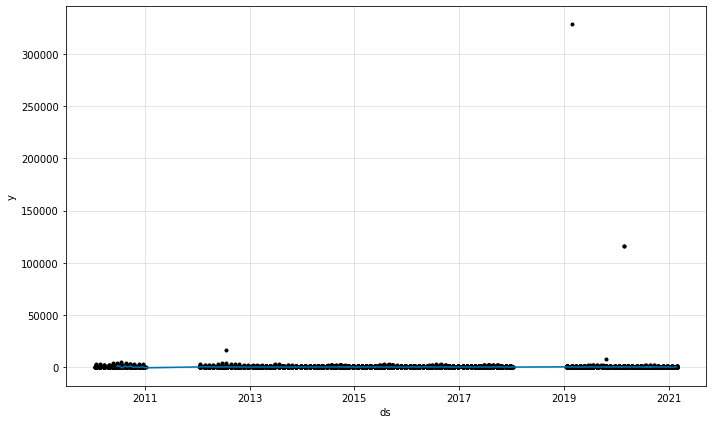

In [ ]:
plot_3 = mdl.plot(data_1_CV)

In [ ]:
r2_daily = r2_score(data_1_CV['y'],data_1_CV['yhat'])

In [ ]:
r2_daily

-0.03741972521850623

In [ ]:
print(len(data_1['y']))

362622
